In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# 设置字体大小
plt.rcParams['font.size'] = 20
# 加粗图片边框
plt.rcParams['axes.linewidth'] = 2
# legend尺寸
plt.rcParams['legend.fontsize'] = 15

In [28]:
data_path = r'..\Question\Wimbledon_featured_matches.csv'
data = pd.read_csv(data_path)
print(data.head())

              match_id         player1        player2 elapsed_time  set_no  \
0  2023-wimbledon-1301  Carlos Alcaraz  Nicolas Jarry     00:00:00       1   
1  2023-wimbledon-1301  Carlos Alcaraz  Nicolas Jarry     00:00:38       1   
2  2023-wimbledon-1301  Carlos Alcaraz  Nicolas Jarry     00:01:01       1   
3  2023-wimbledon-1301  Carlos Alcaraz  Nicolas Jarry     00:01:31       1   
4  2023-wimbledon-1301  Carlos Alcaraz  Nicolas Jarry     00:02:21       1   

   game_no  point_no  p1_sets  p2_sets  p1_games  ...  p2_break_pt_won  \
0        1         1        0        0         0  ...                0   
1        1         2        0        0         0  ...                0   
2        1         3        0        0         0  ...                0   
3        1         4        0        0         0  ...                0   
4        1         5        0        0         0  ...                0   

  p1_break_pt_missed p2_break_pt_missed  p1_distance_run  p2_distance_run  \
0        

In [29]:
# 按match_id分组
grouped = data.groupby('match_id')
print(grouped.size())

match_id
2023-wimbledon-1301    300
2023-wimbledon-1302    201
2023-wimbledon-1303    134
2023-wimbledon-1304    337
2023-wimbledon-1305    246
2023-wimbledon-1306    332
2023-wimbledon-1307    232
2023-wimbledon-1308    190
2023-wimbledon-1309    213
2023-wimbledon-1310    318
2023-wimbledon-1311    170
2023-wimbledon-1312    275
2023-wimbledon-1313    290
2023-wimbledon-1314    185
2023-wimbledon-1315    198
2023-wimbledon-1316    167
2023-wimbledon-1401    225
2023-wimbledon-1402    274
2023-wimbledon-1403    122
2023-wimbledon-1404    286
2023-wimbledon-1405    215
2023-wimbledon-1406    195
2023-wimbledon-1407    331
2023-wimbledon-1408    271
2023-wimbledon-1501    189
2023-wimbledon-1502    283
2023-wimbledon-1503    193
2023-wimbledon-1504    217
2023-wimbledon-1601    159
2023-wimbledon-1602    202
2023-wimbledon-1701    334
dtype: int64


In [30]:
sample_match = grouped.get_group('2023-wimbledon-1301')
print(sample_match)

                match_id         player1        player2 elapsed_time  set_no  \
0    2023-wimbledon-1301  Carlos Alcaraz  Nicolas Jarry     00:00:00       1   
1    2023-wimbledon-1301  Carlos Alcaraz  Nicolas Jarry     00:00:38       1   
2    2023-wimbledon-1301  Carlos Alcaraz  Nicolas Jarry     00:01:01       1   
3    2023-wimbledon-1301  Carlos Alcaraz  Nicolas Jarry     00:01:31       1   
4    2023-wimbledon-1301  Carlos Alcaraz  Nicolas Jarry     00:02:21       1   
..                   ...             ...            ...          ...     ...   
295  2023-wimbledon-1301  Carlos Alcaraz  Nicolas Jarry     03:53:25       4   
296  2023-wimbledon-1301  Carlos Alcaraz  Nicolas Jarry     03:54:01       4   
297  2023-wimbledon-1301  Carlos Alcaraz  Nicolas Jarry     03:55:02       4   
298  2023-wimbledon-1301  Carlos Alcaraz  Nicolas Jarry     03:55:34       4   
299  2023-wimbledon-1301  Carlos Alcaraz  Nicolas Jarry     03:56:11       4   

     game_no  point_no  p1_sets  p2_set

In [31]:
def analyse_match(match):
    match_id = match['match_id']
    # point_victor,winner of the point,"1 if player 1 wins, 2 if player 2 wins"
    # 统计单盘比赛中每个球员的得分情况
    set_grouped = match.groupby('set_no')
    res_dict = {
        'player_score': 0,
        'player_score_serve': 0,
        'player_score_return': 0,
        'player_score_after_win_point': 0,
        'player_score_after_lost_point': 0,
        'player_score_after_win_game': 0,
        'player_score_after_lost_game': 0,
        'player_score_after_win_set': 0,
        'player_score_after_lost_set': 0,

        'player_score_after_win_point_with_server': 0,
        'player_score_after_lost_point_with_server': 0,
        'player_score_after_win_game_with_server': 0,
        'player_score_after_lost_game_with_server': 0,
        'player_score_after_win_set_with_server': 0,
        'player_score_after_lost_set_with_server': 0,

        'player_score_after_win_point_with_return': 0,
        'player_score_after_lost_point_with_return': 0,
        'player_score_after_win_game_with_return': 0,
        'player_score_after_lost_game_with_return': 0,
        'player_score_after_win_set_with_return': 0,
        'player_score_after_lost_set_with_return': 0
    }
    last_set_winner = 0
    for set_no, set_data in set_grouped:
        game_grouped = set_data.groupby('game_no')
        last_game_winner = 0
        for game_no, game_data in game_grouped:
            last_point_winner = 0
            for point_no, point_data in game_data.iterrows():
                point_victor = point_data['point_victor']
                server = point_data['server']
                
                res_dict['player_score'] += 1
                res_dict['player_score_serve'] += (server == point_victor)
                res_dict['player_score_return'] += (server != point_victor)
                res_dict['player_score_after_win_point'] += (last_point_winner == point_victor)
                res_dict['player_score_after_lost_point'] += (last_point_winner != point_victor and last_point_winner != 0)
                res_dict['player_score_after_win_game'] += (last_game_winner == point_victor)
                res_dict['player_score_after_lost_game'] += (last_game_winner != point_victor and last_game_winner != 0)
                res_dict['player_score_after_win_set'] += (last_set_winner == point_victor)
                res_dict['player_score_after_lost_set'] += (last_set_winner != point_victor and last_set_winner != 0)

                res_dict['player_score_after_win_point_with_server'] += (last_point_winner == point_victor and server == point_victor)
                res_dict['player_score_after_lost_point_with_server'] += (last_point_winner != point_victor and last_point_winner != 0 and server == point_victor)
                res_dict['player_score_after_win_game_with_server'] += (last_game_winner == point_victor and server == point_victor)
                res_dict['player_score_after_lost_game_with_server'] += (last_game_winner != point_victor and last_game_winner != 0 and server == point_victor)
                res_dict['player_score_after_win_set_with_server'] += (last_set_winner == point_victor and server == point_victor)
                res_dict['player_score_after_lost_set_with_server'] += (last_set_winner != point_victor and last_set_winner != 0 and server == point_victor)

                res_dict['player_score_after_win_point_with_return'] += (last_point_winner == point_victor and server != point_victor)
                res_dict['player_score_after_lost_point_with_return'] += (last_point_winner != point_victor and last_point_winner != 0 and server != point_victor)
                res_dict['player_score_after_win_game_with_return'] += (last_game_winner == point_victor and server != point_victor)
                res_dict['player_score_after_lost_game_with_return'] += (last_game_winner != point_victor and last_game_winner != 0 and server != point_victor)
                res_dict['player_score_after_win_set_with_return'] += (last_set_winner == point_victor and server != point_victor)
                res_dict['player_score_after_lost_set_with_return'] += (last_set_winner != point_victor and last_set_winner != 0 and server != point_victor)

            
                last_point_winner = point_data['point_victor']
            last_game_winner = point_data['game_victor']
        last_set_winner = point_data['set_victor']
    # print(res_dict)
    return res_dict
res_dict = analyse_match(sample_match)
print(res_dict)

{'player_score': 300, 'player_score_serve': 195, 'player_score_return': 105, 'player_score_after_win_point': 130, 'player_score_after_lost_point': 127, 'player_score_after_win_game': 123, 'player_score_after_lost_game': 152, 'player_score_after_win_set': 113, 'player_score_after_lost_set': 124, 'player_score_after_win_point_with_server': 95, 'player_score_after_lost_point_with_server': 69, 'player_score_after_win_game_with_server': 44, 'player_score_after_lost_game_with_server': 133, 'player_score_after_win_set_with_server': 73, 'player_score_after_lost_set_with_server': 81, 'player_score_after_win_point_with_return': 35, 'player_score_after_lost_point_with_return': 58, 'player_score_after_win_game_with_return': 79, 'player_score_after_lost_game_with_return': 19, 'player_score_after_win_set_with_return': 40, 'player_score_after_lost_set_with_return': 43}


[52.806666666666665, 107.62189054726367, 35.83582089552239, 69.22255192878339, 48.203252032520325, 113.06626506024097, 106.21551724137932, 76.05263157894737, 46.009389671361504, 13.89308176100629, 30.6, 12.829090909090908, 36.751724137931035, 44.28108108108108, 56.81818181818182, 46.035928143712574, 46.08, 89.93430656934306, 15.754098360655737, 86.16083916083916, 50.93953488372093, 42.01025641025641, 143.29909365558913, 144.64944649446494, 64.38095238095238, 73.52650176678445, 37.30569948186528, 45.16129032258065, 14.540880503144654, 52.76237623762376, 31.910179640718564]
{'player_score': 7284, 'player_score_serve': 4903, 'player_score_return': 2381, 'player_score_after_win_point': 3404, 'player_score_after_lost_point': 2692, 'player_score_after_win_game': 2529, 'player_score_after_lost_game': 4027, 'player_score_after_win_set': 2740, 'player_score_after_lost_set': 2617}
0.0
1745.0414607358593


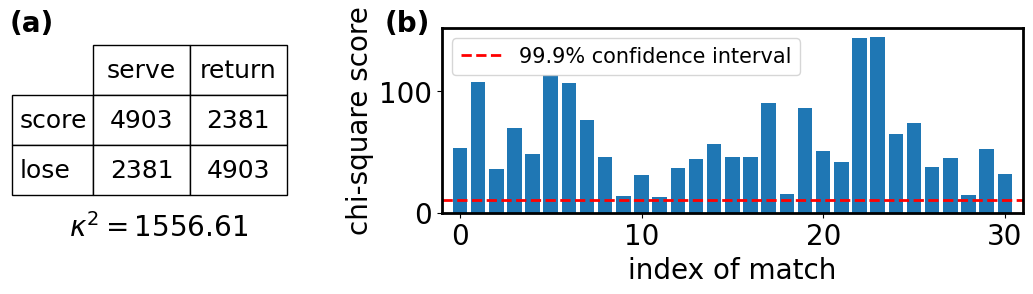

In [32]:
import scipy.stats as stats

# 卡方检验发球优势
def chi_square_test_serve(res_dict):
    player_win_with_serve = res_dict['player_score_serve']
    player_win_with_return = res_dict['player_score_return']
    player_loss_with_serve =  res_dict['player_score_return']
    player_loss_with_return = res_dict['player_score_serve']
    
    # print(player1_score)

    # 卡方检验
    a = player_win_with_serve
    b = player_win_with_return
    c = player_loss_with_serve
    d = player_loss_with_return
    chi_square_score = stats.chi2_contingency([[a, b], [c, d]])[0]
    # print(chi_square_score)
    return chi_square_score

# 检验发球优势
chi_square_score_list = []
ratio_of_score_with_serve = []
for match_id, match in grouped:
    res_dict = analyse_match(match)
    ratio_of_score_with_serve.append(res_dict['player_score_serve']/res_dict['player_score'])
    chi_square_score = chi_square_test_serve(res_dict)
    chi_square_score_list.append(chi_square_score)
print(chi_square_score_list)
# 穷举所有比赛的结果求和
match_all = {'player_score': 0, 'player_score_serve': 0, 'player_score_return': 0, 'player_score_after_win_point': 0, 'player_score_after_lost_point': 0, 'player_score_after_win_game': 0, 'player_score_after_lost_game': 0, 'player_score_after_win_set': 0, 'player_score_after_lost_set': 0}
for match_id, match in grouped:
    res_dict_all = analyse_match(match)
    for key in match_all.keys():
        match_all[key] += res_dict_all[key]
print(match_all)
chi_square_score_all = chi_square_test_serve(match_all)
# p值为
print(stats.chi2_contingency([[match_all['player_score_serve'], match_all['player_score_return']], [match_all['player_score_return'], match_all['player_score_serve']]])[1])
print(chi_square_score_all)

# 可视化发球优势kappa
fondsize = 20
fig, axes = plt.subplots(1, 2, figsize=(12, 2.4), width_ratios=[1, 3])
# 两个子图间加间距
plt.subplots_adjust(wspace=0.4)

# 堆叠连列表，显示每局比赛中先发优势的分布情况
ax = axes[0]
row_label = ['score', 'lose']
col_label = ['serve', 'return']
values = [[match_all['player_score_serve'], match_all['player_score_return']], [match_all['player_score_return'], match_all['player_score_serve']]]
# 增大行宽度
table = ax.table(cellText=values, rowLabels=row_label, colLabels=col_label, loc='center', cellLoc='center')
table.scale(1, 3)
table.set_fontsize(fondsize)

ax.axis('off')
# 图标下加文字 $kappa = $
ax.text(0.8, 0, r'$\kappa^2 = 1556.61$', transform=ax.transAxes, fontsize=fondsize, weight='bold', va='top', ha='right')

# 图左上标号（a）
ax.text(-0.2, 1.1, '(a)', transform=ax.transAxes, fontsize=fondsize, weight='bold', va='top', ha='right')

ax = axes[1]
ax.bar(np.arange(len(chi_square_score_list)), chi_square_score_list)
ax.set_xlabel('index of match', fontsize=fondsize)
ax.set_xlim(-1, len(chi_square_score_list))

ax.set_ylabel('chi-square score', fontsize=fondsize)
# plt.title('Chi-square score of serve advantage', fontsize=fondsize)
# 置信度
# ax.axhline(y=3.841, color='r', linestyle='--', label='95% confidence interval')
# ax.axhline(y=6.635, color='g', linestyle='--', label='99% confidence interval')
ax.axhline(y=10.827, color='r', linestyle='--', label='99.9% confidence interval', linewidth=2)
ax.legend()
# 图左上标号（b）
ax.text(-0.02, 1.1, '(b)', transform=ax.transAxes, fontsize=fondsize, weight='bold', va='top', ha='right')
save_path = r'C:\Users\cheng\Desktop\20240201\Latex\figures\serve_advantage_kappa.png'
plt.savefig(save_path, bbox_inches='tight', dpi=300)
plt.savefig(save_path.replace('.png', '.svg'), bbox_inches='tight', dpi=300)
plt.savefig(save_path.replace('.png', '.pdf'), bbox_inches='tight', dpi=300)
plt.show()



[0.3185919663858667, 0.025843773860892073, 0.020548594480556414, 0.0, 0.18078626569766498, 0.0, 2.452317908117825, 0.9473963329990118, 0.1559547045183796, 5.678238376088434, 0.38012602473365026, 0.0, 0.0, 0.3130627874970705, 0.006555110602593445, 0.18882101940612528, 0.0, 0.02281746031746032, 0.0, 0.5442789071277719, 0.042807819774323144, 0.9764454778860082, 0.061941976910364474, 2.564092508527328, 0.339603014680868, 0.36713446378692854, 1.6373980130661165, 0.31266812324487453, 0.14556597873671082, 2.015617782384372, 0.7727710275701963]
{'player_score_after_lost_point_with_server': 1492, 'player_score_after_win_point_with_server': 2638, 'player_score_after_lost_point_with_return': 1200, 'player_score_after_win_point_with_return': 766}
4.4743349241096855


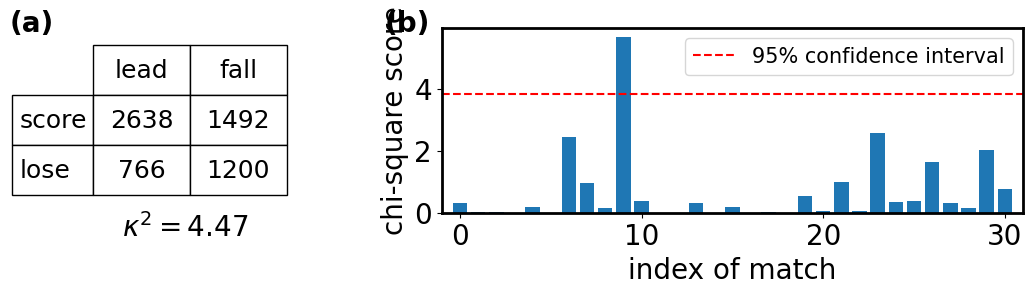

In [38]:
# 条件独立性检验（发球=True）
def chi_square_test_after_win_point_with_server(res_dict):
    player_win_after_lose_with_serve = res_dict['player_score_after_lost_point_with_server']
    player_win_after_win_with_serve = res_dict['player_score_after_win_point_with_server']
    player_loss_after_loss_with_serve = res_dict['player_score_after_win_point_with_return']
    player_loss_after_win_with_serve = res_dict['player_score_after_lost_point_with_return']

    # print(player_win_point_with_serve, player_loss_point_with_serve, player_win_point_with_return, player_loss_point_with_return)
    # 卡方检验
    a = player_win_after_lose_with_serve
    b = player_win_after_win_with_serve
    c = player_loss_after_loss_with_serve
    d = player_loss_after_win_with_serve
    chi_square_score = stats.chi2_contingency([[a, b], [c, d]])[0]
    # print(chi_square_score)
    return chi_square_score

# 检验条件独立性
chi_square_score_list = []
for match_id, match in grouped:
    res_dict = analyse_match(match)
    chi_square_score = chi_square_test_after_win_point_with_server(res_dict)
    chi_square_score_list.append(chi_square_score)
print(chi_square_score_list)
# 穷举所有比赛的结果求和
match_all = {'player_score_after_lost_point_with_server': 0, 'player_score_after_win_point_with_server': 0, 'player_score_after_lost_point_with_return': 0, 'player_score_after_win_point_with_return': 0}
for match_id, match in grouped:
    res_dict_all = analyse_match(match)
    for key in match_all.keys():
        match_all[key] += res_dict_all[key]
print(match_all)
chi_square_score_all = chi_square_test_after_win_point_with_server(match_all)
print(chi_square_score_all)


# 可视化
fondsize = 20
fig, axes = plt.subplots(1, 2, figsize=(12, 2.4), width_ratios=[1, 3])
# 两个子图间加间距
plt.subplots_adjust(wspace=0.4)

# 堆叠连列表，显示每局比赛中分数领先的分布情况
ax = axes[0]
col_label = ['lead', 'fall']
row_label = ['score', 'lose']
values = [[match_all['player_score_after_win_point_with_server'], match_all['player_score_after_lost_point_with_server']], [match_all['player_score_after_win_point_with_return'], match_all['player_score_after_lost_point_with_return']]
]
# 增大行宽度
table = ax.table(cellText=values, rowLabels=row_label, colLabels=col_label, loc='center', cellLoc='center')
table.scale(1, 3)
table.set_fontsize(fondsize-2)
ax.axis('off')
# 图标下加文字 $kappa = $, 保留两位小数
ax.text(0.8, 0, f'$\kappa^2 = {chi_square_score_all:.2f}$', transform=ax.transAxes, fontsize=fondsize, weight='bold', va='top', ha='right')

# 图左上标号（a）
ax.text(-0.2, 1.1, '(a)', transform=ax.transAxes, fontsize=fondsize, weight='bold', va='top', ha='right')

ax = axes[1]
ax.bar(np.arange(len(chi_square_score_list)), chi_square_score_list)
ax.set_xlabel('index of match', fontsize=fondsize)
ax.set_xlim(-1, len(chi_square_score_list))

ax.set_ylabel('chi-square score', fontsize=fondsize)
# plt.title('Chi-square score of serve advantage', fontsize=fondsize)
# 置信度
ax.axhline(y=3.841, color='r', linestyle='--', label='95% confidence interval')
# ax.axhline(y=6.635, color='g', linestyle='--', label='99% confidence interval')
# ax.axhline(y=10.827, color='r', linestyle='--', label='99.9% confidence interval', linewidth=2)
ax.legend()
# 图左上标号（b）
ax.text(-0.02, 1.1, '(b)', transform=ax.transAxes, fontsize=fondsize, weight='bold', va='top', ha='right')
save_path = r'C:\Users\cheng\Desktop\20240201\Latex\figures\points_win_kappa.png'
plt.savefig(save_path, bbox_inches='tight', dpi=300)
plt.savefig(save_path.replace('.png', '.svg'), bbox_inches='tight', dpi=300)
plt.savefig(save_path.replace('.png', '.pdf'), bbox_inches='tight', dpi=300)
plt.show()

In [39]:
# 条件独立性检验（发球=True）
def chi_square_test_after_win_game_with_server(res_dict):
    player_win_after_lose_with_serve = res_dict['player_score_after_lost_game_with_server']
    player_win_after_win_with_serve = res_dict['player_score_after_win_game_with_server']
    player_loss_after_win_with_serve = res_dict['player_score_after_lost_game_with_return']
    player_loss_after_loss_with_serve = res_dict['player_score_after_win_game_with_return']
    # print(player_win_point_with_serve, player_loss_point_with_serve, player_win_point_with_return, player_loss_point_with_return)
    # 卡方检验
    a = player_win_after_win_with_serve
    b = player_win_after_lose_with_serve
    c = player_loss_after_win_with_serve
    d = player_loss_after_loss_with_serve
    chi_square_score = stats.chi2_contingency([[a, b], [c, d]])[0]
    # print(chi_square_score)
    return chi_square_score

# 检验条件独立性
chi_square_score_list = []
for match_id, match in grouped:
    res_dict = analyse_match(match)
    chi_square_score = chi_square_test_after_win_game_with_server(res_dict)
    chi_square_score_list.append(chi_square_score)
print(chi_square_score_list)
# 穷举所有比赛的结果求和
match_all = {'player_score_after_lost_game_with_server': 0, 'player_score_after_win_game_with_server': 0, 'player_score_after_lost_game_with_return': 0, 'player_score_after_win_game_with_return': 0}
for match_id, match in grouped:
    res_dict_all = analyse_match(match)
    for key in match_all.keys():
        match_all[key] += res_dict_all[key]
print(match_all)
chi_square_score_all = chi_square_test_after_win_game_with_server(match_all)
print(chi_square_score_all)


[0.781688980471351, 0.04973925228720292, 1.2674999999999998, 0.7414439606384965, 0.7124821976412977, 0.0006011152314285038, 0.8723436186494878, 0.2080808906323781, 0.0922026726155122, 0.7188903950152161, 0.0024182328561876618, 0.0, 0.2027475859944352, 0.0, 0.0, 0.0, 0.0022161274155254158, 0.026188108116084963, 0.322464298110775, 0.11172421750627969, 0.0, 7.280237722048067, 0.042869958055536214, 0.0016455530886770216, 0.0009586653000938271, 0.3491084832017789, 8.568816821056132, 0.08220943405694175, 0.30356317669382743, 0.0, 0.7150088180070545]
{'player_score_after_lost_game_with_server': 3676, 'player_score_after_win_game_with_server': 745, 'player_score_after_lost_game_with_return': 351, 'player_score_after_win_game_with_return': 1784}
0.14649067383913794


In [35]:
# 条件独立性检验（发球=True）
def chi_square_test_after_win_set_with_server(res_dict):
    player_win_after_lose_with_serve = res_dict['player_score_after_lost_set_with_server']
    player_win_after_win_with_serve = res_dict['player_score_after_win_set_with_server']
    player_loss_after_win_with_serve = res_dict['player_score_after_lost_set_with_return']
    player_loss_after_loss_with_serve = res_dict['player_score_after_win_set_with_return']
    # print(player_win_point_with_serve, player_loss_point_with_serve, player_win_point_with_return, player_loss_point_with_return)
    # 卡方检验
    a = player_win_after_win_with_serve
    b = player_win_after_lose_with_serve
    c = player_loss_after_win_with_serve
    d = player_loss_after_loss_with_serve
    chi_square_score = stats.chi2_contingency([[a, b], [c, d]])[0]
    # print(chi_square_score)
    return chi_square_score

# 检验条件独立性
chi_square_score_list = []
for match_id, match in grouped:
    res_dict = analyse_match(match)
    chi_square_score = chi_square_test_after_win_set_with_server(res_dict)
    chi_square_score_list.append(chi_square_score)
print(chi_square_score_list)
# 穷举所有比赛的结果求和
match_all = {'player_score_after_lost_set_with_server': 0, 'player_score_after_win_set_with_server': 0, 'player_score_after_lost_set_with_return': 0, 'player_score_after_win_set_with_return': 0}
for match_id, match in grouped:
    res_dict_all = analyse_match(match)
    for key in match_all.keys():
        match_all[key] += res_dict_all[key]
print(match_all)
chi_square_score_all = chi_square_test_after_win_set_with_server(match_all)
print(chi_square_score_all)

[0.26100552693948903, 0.5634990009990005, 6.0057332041343665, 0.1777497104236975, 0.4607431290891879, 0.0, 2.4722910938387628, 0.07218903186274517, 0.0027773077182419873, 1.7261476594454626, 5.867456896551724, 0.07601706803834438, 0.00610748663101617, 12.238113140465835, 0.8470820576498785, 4.134257575757575, 0.4070640419706635, 0.0800295811819696, 5.694533248081841, 0.13435524794091683, 7.818464554789775, 5.001140266176957, 0.06235380472735466, 1.8892260837058417, 2.0067313347030327, 0.023546209252730925, 1.046368482250124, 0.0, 1.3743815570644355, 0.0091362888919241, 0.02328768038837713]
{'player_score_after_lost_set_with_server': 1811, 'player_score_after_win_set_with_server': 1812, 'player_score_after_lost_set_with_return': 806, 'player_score_after_win_set_with_return': 928}
5.713338585458509
